# example: Keras 1D convolutional neural network on iris dataset

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv(
    'iris.csv',
    header = None,
    names  = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['labels'] = df['species'].astype('category').cat.codes

In [4]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['labels']
x_train, x_test, y_train, y_test = train_test_split(np.asarray(x), np.asarray(y), test_size = 0.33, shuffle = True)
num_classes = 3
input_shape = (4,)

# Convert class vectors to binary class matrices using 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary  = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(100, 4, 1)
x_test  = x_test.reshape(50, 4, 1)

In [5]:
model = Sequential()
model.add(Conv1D(
    32,
    (3),
    input_shape = (4, 1),
    activation  = 'relu'
))
model.add(
    MaxPooling1D(
        pool_size   = (2)
    )
)
model.add(Flatten())
model.add(Dropout(rate = 0.5))
model.add(Dense(
    100,
    activation  = 'relu'
))
model.add(Dense(
    num_classes,
    activation  = 'softmax'
))
model.compile(
    loss            = "categorical_crossentropy",
    optimizer       = "adam",
    metrics         = ['accuracy']
)
plot_model(model, to_file="model.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 3,731
Trainable params: 3,731
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define a callback class which is to be passed to the model fitting function
# as an element of a list of possible callbacks.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs = {}):
        self.acc = []
    def on_epoch_end(self, batch, logs = {}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

#checkpoint = keras.callbacks.ModelCheckpoint(
#    filepath       = 'best_model.{epoch:02d}-{val_loss:.2f}.h5',
#    monitor        = 'val_loss',
#    save_best_only = True
#)

In [7]:
epochs     = 500
batch_size = 128

model.fit(
    x_train,
    y_train_binary,
    batch_size      = batch_size,
    epochs          = epochs,
    verbose         = 1,
    validation_data = (x_test, y_test_binary),
    callbacks       = [history]
)

score = model.evaluate(x_test, y_test_binary, verbose = False)

Train on 100 samples, validate on 50 samples
Epoch 1/500
100/100 [==============================] - 1s 11ms/step - loss: 1.1897 - acc: 0.3200 - val_loss: 1.0683 - val_acc: 0.3200
Epoch 2/500
100/100 [==============================] - 0s 35us/step - loss: 1.1266 - acc: 0.3000 - val_loss: 1.0548 - val_acc: 0.3200
Epoch 3/500
100/100 [==============================] - 0s 28us/step - loss: 1.0832 - acc: 0.4000 - val_loss: 1.0430 - val_acc: 0.3200
Epoch 4/500
100/100 [==============================] - 0s 30us/step - loss: 1.0685 - acc: 0.4400 - val_loss: 1.0333 - val_acc: 0.3200
Epoch 5/500
100/100 [==============================] - 0s 31us/step - loss: 1.0314 - acc: 0.4700 - val_loss: 1.0240 - val_acc: 0.3200
Epoch 6/500
100/100 [==============================] - 0s 32us/step - loss: 1.0498 - acc: 0.4300 - val_loss: 1.0152 - val_acc: 0.3200
Epoch 7/500
100/100 [==============================] - 0s 32us/step - loss: 1.0456 - acc: 0.4300 - val_loss: 1.0064 - val_acc: 0.3200
Epoch 8/500
100/1

Epoch 62/500
100/100 [==============================] - 0s 28us/step - loss: 0.6142 - acc: 0.7100 - val_loss: 0.5056 - val_acc: 0.8400
Epoch 63/500
100/100 [==============================] - 0s 30us/step - loss: 0.6012 - acc: 0.7400 - val_loss: 0.4990 - val_acc: 0.8400
Epoch 64/500
100/100 [==============================] - 0s 32us/step - loss: 0.5734 - acc: 0.8200 - val_loss: 0.4922 - val_acc: 0.8600
Epoch 65/500
100/100 [==============================] - 0s 40us/step - loss: 0.6412 - acc: 0.6800 - val_loss: 0.4854 - val_acc: 0.8800
Epoch 66/500
100/100 [==============================] - 0s 37us/step - loss: 0.5630 - acc: 0.8200 - val_loss: 0.4787 - val_acc: 0.8800
Epoch 67/500
100/100 [==============================] - 0s 30us/step - loss: 0.6036 - acc: 0.7500 - val_loss: 0.4724 - val_acc: 0.8800
Epoch 68/500
100/100 [==============================] - 0s 30us/step - loss: 0.6077 - acc: 0.6500 - val_loss: 0.4664 - val_acc: 0.9000
Epoch 69/500
100/100 [==============================] -

Epoch 123/500
100/100 [==============================] - 0s 41us/step - loss: 0.4364 - acc: 0.8100 - val_loss: 0.2789 - val_acc: 0.9600
Epoch 124/500
100/100 [==============================] - 0s 46us/step - loss: 0.4061 - acc: 0.8500 - val_loss: 0.2769 - val_acc: 0.9600
Epoch 125/500
100/100 [==============================] - 0s 29us/step - loss: 0.3861 - acc: 0.8600 - val_loss: 0.2751 - val_acc: 0.9600
Epoch 126/500
100/100 [==============================] - 0s 31us/step - loss: 0.4434 - acc: 0.8000 - val_loss: 0.2733 - val_acc: 0.9400
Epoch 127/500
100/100 [==============================] - 0s 30us/step - loss: 0.3677 - acc: 0.8500 - val_loss: 0.2710 - val_acc: 0.9400
Epoch 128/500
100/100 [==============================] - 0s 29us/step - loss: 0.4334 - acc: 0.8100 - val_loss: 0.2688 - val_acc: 0.9400
Epoch 129/500
100/100 [==============================] - 0s 29us/step - loss: 0.3979 - acc: 0.8100 - val_loss: 0.2661 - val_acc: 0.9600
Epoch 130/500
100/100 [=========================

Epoch 184/500
100/100 [==============================] - 0s 40us/step - loss: 0.3383 - acc: 0.8800 - val_loss: 0.1768 - val_acc: 0.9600
Epoch 185/500
100/100 [==============================] - 0s 32us/step - loss: 0.2899 - acc: 0.9100 - val_loss: 0.1758 - val_acc: 0.9800
Epoch 186/500
100/100 [==============================] - 0s 30us/step - loss: 0.3067 - acc: 0.9200 - val_loss: 0.1755 - val_acc: 0.9800
Epoch 187/500
100/100 [==============================] - 0s 30us/step - loss: 0.2991 - acc: 0.9000 - val_loss: 0.1753 - val_acc: 0.9600
Epoch 188/500
100/100 [==============================] - 0s 29us/step - loss: 0.2743 - acc: 0.9300 - val_loss: 0.1750 - val_acc: 0.9600
Epoch 189/500
100/100 [==============================] - 0s 33us/step - loss: 0.2643 - acc: 0.9300 - val_loss: 0.1744 - val_acc: 0.9600
Epoch 190/500
100/100 [==============================] - 0s 32us/step - loss: 0.2881 - acc: 0.9100 - val_loss: 0.1729 - val_acc: 0.9600
Epoch 191/500
100/100 [=========================

Epoch 245/500
100/100 [==============================] - 0s 33us/step - loss: 0.2436 - acc: 0.9400 - val_loss: 0.1189 - val_acc: 0.9800
Epoch 246/500
100/100 [==============================] - 0s 34us/step - loss: 0.1797 - acc: 0.9300 - val_loss: 0.1195 - val_acc: 0.9800
Epoch 247/500
100/100 [==============================] - 0s 34us/step - loss: 0.1855 - acc: 0.9300 - val_loss: 0.1180 - val_acc: 0.9800
Epoch 248/500
100/100 [==============================] - 0s 32us/step - loss: 0.2234 - acc: 0.9200 - val_loss: 0.1153 - val_acc: 0.9800
Epoch 249/500
100/100 [==============================] - 0s 33us/step - loss: 0.2339 - acc: 0.9100 - val_loss: 0.1146 - val_acc: 0.9800
Epoch 250/500
100/100 [==============================] - 0s 33us/step - loss: 0.2239 - acc: 0.9100 - val_loss: 0.1150 - val_acc: 0.9600
Epoch 251/500
100/100 [==============================] - 0s 33us/step - loss: 0.2368 - acc: 0.8800 - val_loss: 0.1154 - val_acc: 0.9600
Epoch 252/500
100/100 [=========================

Epoch 306/500
100/100 [==============================] - 0s 45us/step - loss: 0.2093 - acc: 0.9300 - val_loss: 0.0913 - val_acc: 0.9800
Epoch 307/500
100/100 [==============================] - 0s 34us/step - loss: 0.1698 - acc: 0.9300 - val_loss: 0.0912 - val_acc: 0.9800
Epoch 308/500
100/100 [==============================] - 0s 32us/step - loss: 0.1466 - acc: 0.9500 - val_loss: 0.0912 - val_acc: 0.9800
Epoch 309/500
100/100 [==============================] - 0s 33us/step - loss: 0.1653 - acc: 0.9600 - val_loss: 0.0913 - val_acc: 0.9800
Epoch 310/500
100/100 [==============================] - 0s 34us/step - loss: 0.1593 - acc: 0.9500 - val_loss: 0.0913 - val_acc: 0.9800
Epoch 311/500
100/100 [==============================] - 0s 30us/step - loss: 0.1602 - acc: 0.9500 - val_loss: 0.0910 - val_acc: 0.9800
Epoch 312/500
100/100 [==============================] - 0s 35us/step - loss: 0.1609 - acc: 0.9500 - val_loss: 0.0900 - val_acc: 0.9800
Epoch 313/500
100/100 [=========================

Epoch 367/500
100/100 [==============================] - 0s 36us/step - loss: 0.1534 - acc: 0.9500 - val_loss: 0.0815 - val_acc: 0.9800
Epoch 368/500
100/100 [==============================] - 0s 35us/step - loss: 0.1242 - acc: 0.9700 - val_loss: 0.0808 - val_acc: 0.9800
Epoch 369/500
100/100 [==============================] - 0s 34us/step - loss: 0.1363 - acc: 0.9500 - val_loss: 0.0799 - val_acc: 0.9800
Epoch 370/500
100/100 [==============================] - 0s 46us/step - loss: 0.1235 - acc: 0.9700 - val_loss: 0.0787 - val_acc: 0.9800
Epoch 371/500
100/100 [==============================] - 0s 39us/step - loss: 0.1252 - acc: 0.9600 - val_loss: 0.0775 - val_acc: 0.9800
Epoch 372/500
100/100 [==============================] - 0s 33us/step - loss: 0.1505 - acc: 0.9400 - val_loss: 0.0766 - val_acc: 0.9800
Epoch 373/500
100/100 [==============================] - 0s 31us/step - loss: 0.1447 - acc: 0.9700 - val_loss: 0.0755 - val_acc: 0.9800
Epoch 374/500
100/100 [=========================

Epoch 428/500
100/100 [==============================] - 0s 44us/step - loss: 0.1297 - acc: 0.9600 - val_loss: 0.0704 - val_acc: 0.9800
Epoch 429/500
100/100 [==============================] - 0s 29us/step - loss: 0.1091 - acc: 0.9900 - val_loss: 0.0710 - val_acc: 0.9800
Epoch 430/500
100/100 [==============================] - 0s 33us/step - loss: 0.1314 - acc: 0.9600 - val_loss: 0.0717 - val_acc: 0.9800
Epoch 431/500
100/100 [==============================] - 0s 30us/step - loss: 0.1180 - acc: 0.9600 - val_loss: 0.0718 - val_acc: 0.9800
Epoch 432/500
100/100 [==============================] - 0s 29us/step - loss: 0.1294 - acc: 0.9500 - val_loss: 0.0719 - val_acc: 0.9800
Epoch 433/500
100/100 [==============================] - 0s 39us/step - loss: 0.1522 - acc: 0.9500 - val_loss: 0.0720 - val_acc: 0.9800
Epoch 434/500
100/100 [==============================] - 0s 33us/step - loss: 0.1290 - acc: 0.9600 - val_loss: 0.0721 - val_acc: 0.9800
Epoch 435/500
100/100 [=========================

Epoch 489/500
100/100 [==============================] - 0s 33us/step - loss: 0.0683 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9800
Epoch 490/500
100/100 [==============================] - 0s 31us/step - loss: 0.1201 - acc: 0.9500 - val_loss: 0.0633 - val_acc: 0.9800
Epoch 491/500
100/100 [==============================] - 0s 32us/step - loss: 0.1284 - acc: 0.9800 - val_loss: 0.0634 - val_acc: 0.9800
Epoch 492/500
100/100 [==============================] - 0s 33us/step - loss: 0.1140 - acc: 0.9700 - val_loss: 0.0635 - val_acc: 0.9800
Epoch 493/500
100/100 [==============================] - 0s 34us/step - loss: 0.1238 - acc: 0.9800 - val_loss: 0.0623 - val_acc: 0.9800
Epoch 494/500
100/100 [==============================] - 0s 34us/step - loss: 0.1353 - acc: 0.9700 - val_loss: 0.0615 - val_acc: 0.9800
Epoch 495/500
100/100 [==============================] - 0s 29us/step - loss: 0.1330 - acc: 0.9300 - val_loss: 0.0616 - val_acc: 0.9800
Epoch 496/500
100/100 [=========================

test loss: 0.06055693209171295
test accuracy: 0.9799999904632568


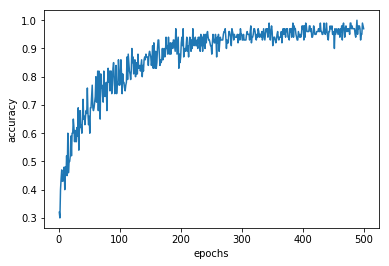

In [8]:
print('test loss:', score[0])
print('test accuracy:', score[1])
plt.plot(range(1, epochs + 1), history.acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()